# PAM test

In [39]:
import numpy as np
import scipy as sp
import sys
from sklearn.cluster import KMeans as sKMeans
from sklearn_extra.cluster import KMedoids
from math import atan2, cos, sin, sqrt
import matplotlib.pyplot as plt
from random import sample
import random
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.stats import skewnorm
import seaborn as sb; sb.set()  

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from platform import python_version
python_version()

'3.8.10'

In [4]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import myvalidation
%autoreload 2

# Test1 - US cities

use distance of cities in the U. S. as reference dataset; convert coordinates to distances.

In [5]:
def distance(coord0,coord1,radius=6373.0):
    dlon = coord1[1] - coord0[1]
    dlat = coord1[0] - coord0[0]

    a = sin(dlat / 2)**2 + cos(coord0[0]) * cos(coord1[0]) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = radius * c

#### load data for US cities

In [6]:
import csv
ifile = open("places.txt")
places = csv.reader(ifile)
data = np.empty((300,2))
for i,city in enumerate(places):
    data[i] = city
nplaces = data.shape[0]
data.shape

(300, 2)

In [7]:
#convert to radians
coords = (np.pi/180.)*data

In [8]:
np.min(data[:,1]),np.max(data[:,1]),np.min(coords[:,1]),np.max(coords[:,1])

(33.429424, 43.5093982, 0.5834535158452129, 0.7593822541512942)

#### convert latitude / longitude to kilometric distances

In [9]:
distances = np.zeros((nplaces,nplaces))
for i in range(nplaces-1):
    for j in range(i+1,nplaces):
        distances[i,j] = distance(coords[i],coords[j])
        distances[j,i] = distances[i,j]

## settings

In [10]:
nclusters = 3
niter = 10
metric = 'euclidean'

In [11]:
S = [18, 109, 119]
U = list(set(list(range(300))).difference(S))

In [12]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(data))
D.shape

(300, 300)

In [13]:
D[U, :][:,S].shape

(297, 3)

In [14]:
np.sort(D[U, :][:, S])

array([[3.90311213e-03, 3.11563820e+01, 3.30968367e+01],
       [8.05730799e-03, 3.11512780e+01, 3.30925382e+01],
       [3.41542054e-03, 3.11592299e+01, 3.30983552e+01],
       [1.51856766e-02, 3.11593670e+01, 3.30951247e+01],
       [3.51084142e-03, 8.20562135e+00, 3.30985910e+01],
       [1.14266472e-02, 8.21433301e+00, 3.31003431e+01],
       [1.34742586e-01, 8.25485882e+00, 3.12743046e+01],
       [7.98205706e-03, 3.11601955e+01, 3.31012505e+01],
       [2.57350661e-02, 3.11599707e+01, 3.31056197e+01],
       [1.40476334e-01, 8.25336877e+00, 3.12812225e+01],
       [7.47458529e-03, 3.11595683e+01, 3.31005874e+01],
       [1.37229354e-01, 8.25519174e+00, 3.12768211e+01],
       [8.39825268e-03, 8.20024965e+00, 3.30871318e+01],
       [2.35489161e-02, 3.11582812e+01, 3.30919468e+01],
       [1.39576606e-01, 8.25297437e+00, 3.12804516e+01],
       [1.37806460e-01, 8.25219965e+00, 3.12789345e+01],
       [1.34329944e-01, 8.25484083e+00, 3.12738673e+01],
       [2.03539414e-02, 3.11582

In [15]:
np.argsort(D[U, :][:, S])

array([[1, 0, 2],
       [1, 0, 2],
       [1, 0, 2],
       [1, 0, 2],
       [2, 0, 1],
       [2, 0, 1],
       [0, 2, 1],
       [1, 0, 2],
       [1, 0, 2],
       [0, 2, 1],
       [1, 0, 2],
       [0, 2, 1],
       [2, 0, 1],
       [1, 0, 2],
       [0, 2, 1],
       [0, 2, 1],
       [0, 2, 1],
       [1, 0, 2],
       [2, 0, 1],
       [2, 0, 1],
       [2, 0, 1],
       [2, 0, 1],
       [0, 2, 1],
       [1, 0, 2],
       [2, 0, 1],
       [1, 0, 2],
       [2, 0, 1],
       [1, 0, 2],
       [1, 0, 2],
       [2, 0, 1],
       [0, 2, 1],
       [1, 0, 2],
       [1, 0, 2],
       [1, 0, 2],
       [0, 2, 1],
       [2, 0, 1],
       [1, 0, 2],
       [2, 0, 1],
       [0, 2, 1],
       [0, 2, 1],
       [0, 2, 1],
       [0, 2, 1],
       [0, 2, 1],
       [0, 2, 1],
       [2, 0, 1],
       [1, 0, 2],
       [0, 2, 1],
       [1, 0, 2],
       [1, 0, 2],
       [2, 0, 1],
       [0, 2, 1],
       [1, 0, 2],
       [0, 2, 1],
       [2, 0, 1],
       [0, 2, 1],
       [1,

## PAM

In [16]:
my_estimator = myclusters.PAM(K=nclusters, niter=niter, metric=metric, debug=True)
cost, medoids = my_estimator.do_clustering(X=data, doswap=True)
cost, medoids, my_estimator.nswap

inertia and medoids b4 swap 16.954711403088062 [18, 109, 119]


(4.640240980864528, [177, 109, 119], 1)

In [17]:
data[my_estimator.medoids]

array([[ -80.8428142,   35.2265794],
       [-112.070655 ,   33.4555253],
       [ -80.528095 ,   43.474541 ]])

(array([[ -80.84422658,   35.21709692],  
        [-112.07160642,   33.46049013],  
        [ -80.52837166,   43.47624848]]),  
 0.2575679782354589)  

In [18]:
my_estimator.clusters

array([109, 109, 109, 109, 119, 119, 177, 109, 109, 177, 109, 177, 119,
       109, 177, 177, 177, 109, 177, 119, 119, 119, 119, 177, 109, 119,
       109, 119, 109, 109, 119, 177, 109, 109, 109, 177, 119, 109, 119,
       177, 177, 177, 177, 177, 177, 119, 109, 177, 109, 109, 119, 177,
       109, 177, 119, 177, 109, 177, 119, 177, 109, 119, 177, 109, 119,
       177, 177, 109, 119, 177, 119, 109, 177, 119, 109, 109, 109, 177,
       119, 109, 109, 177, 109, 119, 109, 109, 119, 109, 119, 109, 119,
       119, 109, 119, 119, 119, 177, 177, 109, 109, 109, 119, 109, 109,
       177, 177, 109, 119, 109, 109, 119, 177, 109, 119, 109, 109, 119,
       109, 119, 119, 177, 177, 109, 119, 177, 119, 177, 119, 177, 119,
       177, 119, 177, 109, 109, 119, 119, 109, 109, 119, 177, 177, 109,
       119, 177, 177, 177, 109, 177, 177, 119, 177, 177, 119, 119, 119,
       119, 119, 177, 177, 119, 109, 119, 109, 177, 119, 119, 119, 119,
       119, 119, 109, 109, 177, 177, 109, 119, 177, 177, 119, 10

In [19]:
myeval = myvalidation.cluster_eval(clusters=my_estimator.clusters,X=data,metric=metric)
myeval(method="CH")

array([4.11623557e+07, 2.57567978e-01])

# test2 - Gaussian blobs

In [20]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1,1), random.uniform(-1,1))
        s = random.uniform(0.05,0.15)
        x = []
        while len(x) < n:
            a,b = np.array([np.random.normal(c[0],s),np.random.normal(c[1],s)])
            if abs(a) and abs(b)<1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

In [21]:
np.random.seed(0)
random.seed(0)
data = init_board_gauss(2500,10)
data.shape

(2500, 2)

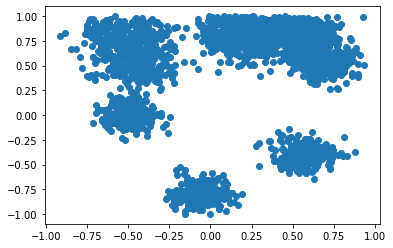

In [22]:
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)

In [23]:
for k in range(2, 8):
    my_estimator = myclusters.PAM(K=k,metric=metric, niter=niter, debug=True)
    cost, medoids = my_estimator.do_clustering(X=data, doswap=True)
    print("K---", k, cost, medoids, my_estimator.nswap)

inertia and medoids b4 swap 1209.1703614681098 [2284, 2109]
K--- 2 1150.565681563056 [1974, 2127] 2
inertia and medoids b4 swap 892.003440199418 [2284, 2109, 1289]
K--- 3 748.9827407169452 [1975, 2124, 1289] 2
inertia and medoids b4 swap 691.9931675988782 [2284, 2109, 1289, 1645]
K--- 4 634.9724152655177 [2478, 2124, 1289, 1701] 3
inertia and medoids b4 swap 583.8182440557116 [2284, 2109, 1289, 1645, 533]
K--- 5 499.5656966558495 [2478, 2200, 1289, 1701, 533] 3
inertia and medoids b4 swap 490.84906865617444 [2284, 2109, 1289, 1645, 533, 314]
K--- 6 388.2101519278141 [2478, 2120, 1012, 1701, 533, 314] 4
inertia and medoids b4 swap 430.2900634915204 [2284, 2109, 1289, 1645, 533, 314, 986]
K--- 7 359.33263258963143 [1315, 2120, 1124, 1701, 533, 314, 2478] 6


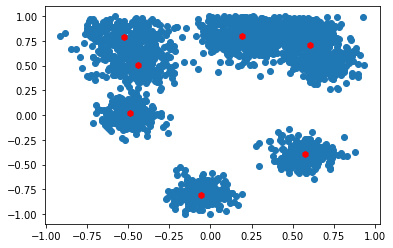

In [24]:
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)
plt.scatter(x[medoids], y[medoids], marker='h',c='r')